In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

### Function definition

In [91]:
# mask manipulation
def mask_building(image_seg, image_flair):
    new_mask = image_seg.copy()
    seuil = 50 # see last section for the definition of the 'seuil' value
    for i in range (len(new_mask)):
        for j in range (len(new_mask[0])):
            if seuil < new_mask[i][j]:
                new_mask[i][j] = 0
            else:
                new_mask[i][j] = 255

    masked = cv2.bitwise_and(image_flair, image_flair, mask=new_mask)

    for i in range (len(masked)):
        for j in range (len(masked[0])):
            if masked[i][j]==0:
                masked[i][j] = 30
    return masked

In [92]:
# Save the image
def save_masked_brain(img_name, masked, folder):
    try:
        os.mkdir(folder)
    except:
        pass
    plt.imsave(folder+img_name, masked, cmap='gray')

### All slices tumor masking

In [93]:
folder_flair = './data_slices/flair'
folder_seg = './data_slices/seg'
for file in glob.glob(folder_flair+"/*.png"):
    slice_name = file.split("\\")[1]
    flair_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    seg_image = cv2.imread(folder_seg+'/'+slice_name, cv2.IMREAD_GRAYSCALE)
    masked = mask_building(seg_image, flair_image)
    save_masked_brain(slice_name, masked, './data_slices/masked_tumors/')

### Example

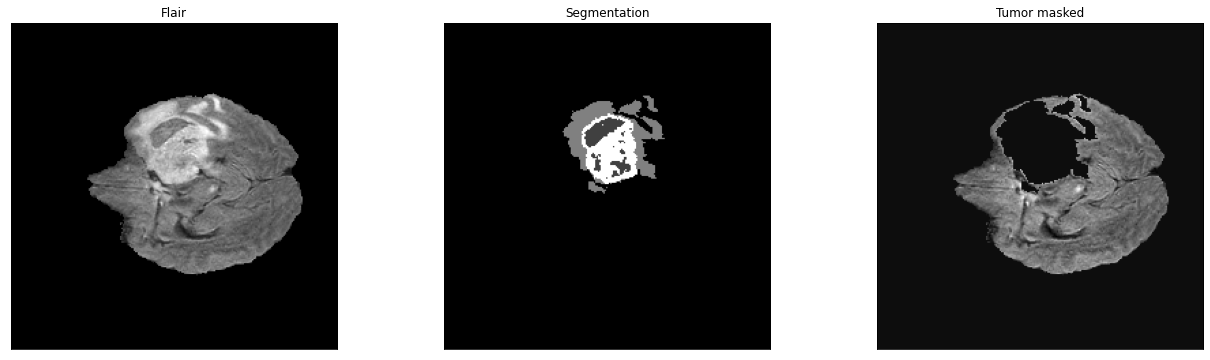

In [98]:
path_to_folder = r'.\data_slices'
img_name = '/BraTS20_Training_001_16.png'
img_flair_name = '/flair'+ img_name
img_seg_name = '/seg' + img_name

image_flair = cv2.imread(path_to_folder + img_flair_name, cv2.IMREAD_GRAYSCALE)
image_seg = cv2.imread(path_to_folder + img_seg_name, cv2.IMREAD_GRAYSCALE)

masked = mask_building(image_seg, image_flair)
save_masked_brain(img_name, masked, './masked_tumors')

plt.figure(figsize=(22,6))
plt.subplot(131), plt.imshow(image_flair, cmap='gray'),plt.title('Flair')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_seg, cmap='gray'),plt.title('Segmentation')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(masked, cmap='gray'),plt.title('Tumor masked')
plt.xticks([]), plt.yticks([])
plt.show()

### Definition of the 'seuil' value

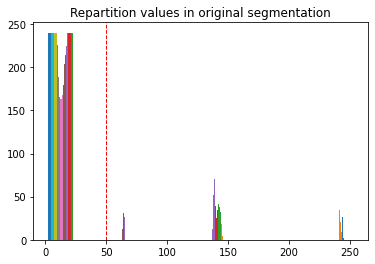

In [97]:
image_flair = cv2.imread(r'.\data_slices\flair\BraTS20_Training_001_26.png', cv2.IMREAD_GRAYSCALE)
image_seg = cv2.imread(r'.\data_slices\seg\BraTS20_Training_001_26.png', cv2.IMREAD_GRAYSCALE)

plt.hist(image_seg), plt.title('Repartition values in original segmentation')
plt.axvline(x=50, color='r', linestyle='dashed', linewidth=1)
plt.show()